In [58]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from deap import base, creator, tools, algorithms
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Bidirectional
from keras.layers import TimeDistributed

In [4]:
path=r'C:\Users\Home\Desktop\cospi_(2000~2016).csv'
raw_df = pd.read_csv(path)

C:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


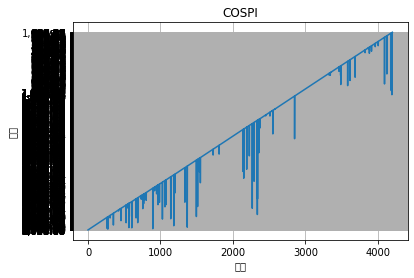

In [5]:
plt.title('COSPI')
plt.ylabel('종가')
plt.xlabel('기간')
plt.grid()

plt.plot(raw_df['종가'], label='종가')

plt.show()

In [6]:
# statistic
raw_df.describe()

,날짜,종가,시가,고가,저가,거래량,변동 %
count,4204,4204,4204,4204,4204,4204,4204
unique,4204,4119,4122,4121,4125,3968,769
top,2016-12-29,"1,937.68","1,933.45","1,995.86","1,915.69",1.02B,-0.03%
freq,1,2,3,3,2,4,25


In [170]:
# Missing Data 확인

raw_df.isnull().sum()

날짜      0
종가      0
시가      0
고가      0
저가      0
거래량     0
변동 %    0
dtype: int64

In [159]:
# 최소값이 0 인 column 체크

for col in raw_df.columns:

    if raw_df[col].min() == 0:
        col_name = col
        print(col_name, type(col_name))

In [7]:
raw_df['거래량']=raw_df['거래량'].str.replace('B','0000000')
raw_df['거래량']=raw_df['거래량'].str.replace('M','0000')
raw_df['거래량']=raw_df['거래량'].str.replace('K','0')
raw_df['거래량']=raw_df['거래량'].str.replace('.','')
raw_df['거래량']=raw_df['거래량'].astype(float)
raw_df['거래량'].head()

C:\Users\Home\AppData\Local\Temp\ipykernel_357664\3287552335.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  raw_df['거래량']=raw_df['거래량'].str.replace('.','')


0    264520000.0
1    356590000.0
2    384030000.0
3    366640000.0
4    310880000.0
Name: 거래량, dtype: float64

In [8]:
raw_df['변동 %']=raw_df['변동 %'].str.replace('%','')
raw_df['변동 %']=raw_df['변동 %'].astype(float)
raw_df['변동 %'].head()

0    0.10
1   -0.87
2    0.22
3    0.09
4    0.01
Name: 변동 %, dtype: float64

In [9]:
change=['종가', '시가', '고가', '저가']
for i in change:
    raw_df[i] = raw_df[i].str.replace(',','')

In [201]:
# statistic
raw_df.head()

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2016-12-29,2026.46,2020.42,2026.57,2016.25,264520000.0,0.10
1,2016-12-28,2024.49,2021.86,2029.69,2020.86,356590000.0,-0.87
2,2016-12-27,2042.17,2040.74,2044.43,2037.12,384030000.0,0.22
3,2016-12-26,2037.75,2038.33,2039.76,2034.80,366640000.0,0.09
4,2016-12-23,2035.90,2036.17,2037.71,2031.54,310880000.0,0.01


In [11]:
# normalization
y_col=raw_df['종가']
y_df=pd.DataFrame(y_col)

scaler = MinMaxScaler()
scale_cols = ['시가', '고가', '저가', '거래량']

x_df = scaler.fit_transform(raw_df[scale_cols])
x_df = pd.DataFrame(x_df, columns=scale_cols)

scaled_df = pd.concat([y_df, x_df], axis = 1)
# scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)

print(scaled_df)

           종가        시가        고가        저가       거래량
0     2026.46  0.883180  0.883524  0.892680  0.111079
1     2024.49  0.883999  0.885298  0.895331  0.149766
2     2042.17  0.894730  0.893677  0.904679  0.161296
3     2037.75  0.893360  0.891022  0.903345  0.153989
4     2035.90  0.892132  0.889857  0.901471  0.130559
...       ...       ...       ...       ...       ...
4199   987.24  0.291637  0.297091  0.288310  0.100851
4200   948.65  0.274301  0.283004  0.268659  0.090548
4201   960.79  0.311121  0.308437  0.281687  0.085446
4202   986.31  0.307097  0.315042  0.299250  0.108213
4203  1059.04  0.319294  0.337587  0.317958  0.082245

[4204 rows x 5 columns]


In [393]:
# normalization 종가까지
y_col=raw_df['종가']
y_df=pd.DataFrame(y_col)

scaler = MinMaxScaler()
scale_cols = ['종가', '시가', '고가', '저가', '거래량']

scaled_df = scaler.fit_transform(raw_df[scale_cols])
scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)

print(scaled_df)

            종가        시가        고가        저가       거래량
0     0.884956  0.883180  0.883524  0.892680  0.111079
1     0.883837  0.883999  0.885298  0.895331  0.149766
2     0.893881  0.894730  0.893677  0.904679  0.161296
3     0.891370  0.893360  0.891022  0.903345  0.153989
4     0.890319  0.892132  0.889857  0.901471  0.130559
...        ...       ...       ...       ...       ...
4199  0.294557  0.291637  0.297091  0.288310  0.100851
4200  0.272634  0.274301  0.283004  0.268659  0.090548
4201  0.279531  0.311121  0.308437  0.281687  0.085446
4202  0.294029  0.307097  0.315042  0.299250  0.108213
4203  0.335348  0.319294  0.337587  0.317958  0.082245

[4204 rows x 5 columns]


In [12]:
# feature_df, label_df 생성
feature_cols = ['종가', '시가', '고가', '저가', '거래량']
label_cols = [ '종가' ]

X = pd.DataFrame(scaled_df, columns=feature_cols)
Y = pd.DataFrame(scaled_df, columns=label_cols)

# DataFrame => Numpy 변환
X = X.to_numpy()
X = X.astype(np.float32)
Y = Y.to_numpy()
Y = Y.astype(np.float32)

In [13]:
split = 3361 # 80% of dataset-> training data, 20% of dataset -> holdout data
X_train = X[:split]
y_train = Y[:split]
X_test = X[split:]
y_test = Y[split:]
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train,
                                                 test_size=0.15)

In [ ]:
import numpy as np
import random
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the parameter search space
window_sizes = [5, 10, 15]  # Possible window sizes
lstm_units = [7, 15, 22]  # Possible LSTM units
hidden_layers = [1, 2, 3]  # Possible numbers of hidden layers

# Define the fitness function to evaluate the performance of a parameter set
def fitness_function(individual, X_train, y_train, X_val, y_val):
    window_size, lstm_unit, hidden_layer = individual

    # Create and train the LSTM model
    model = Sequential()
    model.add(LSTM(units=int(lstm_unit), input_shape=(5, 1)))
    for _ in range(int(hidden_layer)):
        model.add(Dense(units=int(lstm_unit), activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64, verbose=0, callbacks=[early_stopping])  # Training without printing progress

    # Evaluate the model on the validation set
    predictions = model.predict(X_val)
    mse = np.mean((predictions - y_val) ** 2)
    mae = np.mean(np.abs(predictions - y_val))
    mape = np.mean(np.abs((y_val - predictions) / y_val)) * 100

    return mse, mae, mape   # Return mean squared error, mean absolute error, and mean absolute percentage error as fitness (minimization problem)


# population_size = 3
# generations = 2
# mutation_rate = 0.15
# crossover_rate = 0.7 

# Define the GA parameters
population_size= 70
generations = 10
mutation_rate = 0.15
crossover_rate = 0.7


# Define the population initialization function
def initialize_population():
    population = []
    for _ in range(population_size):
        window_size = random.choice(window_sizes)
        lstm_unit = random.choice(lstm_units)
        hidden_layer = random.choice(hidden_layers)
        individual = (window_size, lstm_unit, hidden_layer)
        population.append(tuple(individual))
    return population

# Define the selection function (tournament selection)
def selection(population, k=3):
    selected = []
    population_list = population.values.tolist()  # Convert DataFrame to a list
    for _ in range(population_size):
        if len(population_list) < k:
            competitors = population_list
        else:
            competitors = random.sample(population_list, k)
        competitors_fitness = [fitness_function(individual, X_train, y_train, X_val, y_val) for individual in competitors]

        # Check if all fitness values are the same
        if len(set(competitors_fitness)) == 1:
            selected.append(random.choice(competitors))
        else:
            max_fitness_idx = random.choice([i for i, f in enumerate(competitors_fitness) if f == max(competitors_fitness)])
            selected.append(competitors[max_fitness_idx])
    return selected

# Define the crossover function
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Define the mutation function
def mutation(individual):
    mutated = list(individual)
    for i in range(len(mutated)):
        if random.random() < mutation_rate:
            if i == 0:
                mutated[i] = random.choice(window_sizes)
            elif i == 1:
                mutated[i] = random.choice(lstm_units)
            else:
                mutated[i] = random.choice(hidden_layers)
    return tuple(mutated)

# Generate the initial population
population = initialize_population()

# Initialize best fitness values
best_mse = float('inf')
best_mae = float('inf')
best_mape = float('inf')

# Run the GA for the specified number of generations
for generation in range(generations):
    print(f"Generation {generation+1}/{generations}")
    print(f"Population: {population}")
    fitness_values = pd.DataFrame([fitness_function(individual, X_train, y_train, X_val, y_val) for individual in population], columns=['Fitness (MSE)', 'Fitness (MAE)', 'Fitness (MAPE)'])

    # Combine the population with their fitness values
    population_with_fitness = pd.concat([pd.DataFrame(population), fitness_values], axis=1)
    population_with_fitness.columns = ['Window Size', 'LSTM Units', 'Hidden Layers', 'Fitness (MSE)', 'Fitness (MAE)', 'Fitness (MAPE)']

    # Sort the population by fitness in ascending order (lower MSE is better)
    sorted_population = population_with_fitness.astype({'Fitness (MSE)': float, 'Fitness (MAE)': float, 'Fitness (MAPE)': float}).sort_values(by='Fitness (MSE)', ascending=True, ignore_index=True)

    # Print the best individual in the current generation
    best_individual = sorted_population.iloc[0]
    print(f"Best Individual: Window Size={best_individual['Window Size']}, LSTM Units={best_individual['LSTM Units']}, Hidden Layers={best_individual['Hidden Layers']}")
    print(f"Fitness (MSE): {best_individual['Fitness (MSE)']}, Fitness (MAE): {best_individual['Fitness (MAE)']}, Fitness (MAPE): {best_individual['Fitness (MAPE)']}")

    # Update the best fitness values
    if best_individual['Fitness (MSE)'] < best_mse:
        best_mse = best_individual['Fitness (MSE)']
    if best_individual['Fitness (MAE)'] < best_mae:
        best_mae = best_individual['Fitness (MAE)']
    if best_individual['Fitness (MAPE)'] < best_mape:
        best_mape = best_individual['Fitness (MAPE)']

    # Perform selection and crossover to create the next generation
    selected_population = selection(sorted_population.iloc[:, :3])
    if len(selected_population) % 2 != 0:
        selected_population = selected_population[:-1]  # Exclude the last individual if the length is odd

    next_generation = []
    for i in range(0, len(selected_population), 2):
        if random.random() < crossover_rate:  # Perform crossover based on the crossover rate
            child1, child2 = crossover(selected_population[i], selected_population[i + 1])
            next_generation.append(child1)
            next_generation.append(child2)
        else:
            next_generation.append(selected_population[i])
            next_generation.append(selected_population[i + 1])    
    
    
    
    # Apply mutation to the next generation
    next_generation = [mutation(individual) for individual in next_generation]

    # Update the population for the next generation
    population = next_generation

print("Genetic Algorithm finished.")
print(f"Best Fitness values across all generations:")
print(f"MSE: {best_mse}")
print(f"MAE: {best_mae}")
print(f"MAPE: {best_mape}")

Generation 1/10
Population: [(15, 22, 1), (5, 7, 3), (10, 22, 3), (10, 22, 3), (15, 22, 1), (15, 15, 3), (5, 15, 3), (5, 22, 3), (15, 15, 2), (5, 22, 2), (10, 22, 2), (15, 7, 3), (10, 22, 2), (10, 15, 3), (10, 15, 2), (10, 22, 1), (5, 7, 3), (15, 7, 2), (5, 15, 1), (15, 15, 3), (5, 22, 3), (10, 7, 3), (15, 22, 2), (10, 7, 2), (10, 22, 1), (15, 7, 1), (15, 22, 1), (15, 15, 3), (10, 15, 2), (15, 22, 1), (5, 22, 3), (10, 22, 3), (15, 7, 1), (5, 7, 1), (5, 22, 3), (10, 7, 2), (15, 7, 2), (5, 15, 2), (10, 7, 2), (10, 7, 2), (15, 15, 1), (5, 7, 2), (15, 22, 3), (5, 15, 1), (5, 7, 1), (15, 15, 2), (10, 22, 1), (10, 7, 1), (5, 7, 2), (5, 22, 3), (5, 15, 1), (5, 15, 1), (5, 15, 3), (10, 15, 1), (10, 15, 2), (10, 22, 3), (15, 7, 1), (10, 7, 2), (5, 7, 1), (10, 7, 2), (10, 7, 3), (15, 7, 1), (15, 22, 2), (10, 15, 1), (5, 15, 1), (15, 7, 3), (5, 15, 2), (5, 7, 2), (5, 15, 2), (5, 7, 1)]
4/4 [==============================] - 0s 3ms/step
Epoch 9: early stopping
4/4 [==============================] 

4/4 [==============================] - 0s 2ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 3ms/step
Generation 2/10
Population: [(10, 22, 3), (10, 22, 1), (10, 7, 1), (15, 7, 1), (5, 22, 3), (5, 15, 3), (10, 7, 3), (15, 15, 1), (15, 15, 3), (10, 22, 3), (5, 7, 1), (15, 15, 2), (15, 22, 2), (15, 22, 1), (5, 22, 2), (15, 22, 3), (15, 7, 1), (5, 15, 3), (15, 22, 3), (10, 7, 1), (10, 22, 3), (10, 22, 3), (5, 22, 3), (5, 22, 2), (5, 7, 1), (10, 22, 3), (5, 7, 3), (15, 7, 1), (15, 15, 1), (5, 15, 3), (15, 22, 3), (15, 15, 3), (5, 15, 2), (15, 15, 3), (10, 15, 3), (5, 22, 3), (10, 7, 2), (10, 22, 1), (5, 7, 2), (10, 15, 3), (5, 15, 1), (5, 15, 1), (10, 15, 3), (10, 15, 1), (15, 7, 3), (5, 22, 1), (15, 7, 3), (15, 22, 1), (15, 22, 3), (5, 15, 3), (5, 15, 3), (15, 22, 3), (5, 7, 2), (5, 7, 1), (5, 22, 3), (5, 15, 1), (5, 22, 3), (10, 7, 2), (10, 22, 3), (10, 22, 3), (5, 7, 2), (10, 22, 3), (5, 22, 3), (5, 22, 3), (10, 7, 1), (10, 7, 2), (10, 7, 3), (15, 22, 3), (15, 22

4/4 [==============================] - 1s 3ms/step
Epoch 10: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 10: early stopping
4/4 [==============================] - 1s 4ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 2ms/step
Epoch 8: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 10: early stopping
4/4 [==============================] - 1s 2ms/step
Epoch 8: early stopping
4/4 [==============================] - 0s 4ms/step
Epoch 9: early stopping
4/4 [=================

4/4 [==============================] - 0s 2ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 9ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 10: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 8: early stopping
4/4 [==============================] - 1s 8ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 4ms/step
Epoch 9: early stopping
4/4 [===================

4/4 [==============================] - 1s 3ms/step
Epoch 8: early stopping
4/4 [==============================] - 1s 2ms/step
Epoch 8: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 10: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 4ms/step
Epoch 10: early stopping
4/4 [==============================] - 1s 4ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 2ms/step
Epoch 10: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 8: early stopping
4/4 [==============================] - 1s 7ms/step
Epoch 8: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 10: early stopping
4/4 [==============================] - 1s 4ms/step
Epoch 8: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 8: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 9: early stopping
4/4 [================

4/4 [==============================] - 1s 4ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 5ms/step
Epoch 10: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 8: early stopping
4/4 [==============================] - 1s 6ms/step
Epoch 8: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 2s 7ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 4ms/step
Epoch 9: early stopping
4/4 [===================

4/4 [==============================] - 0s 2ms/step
Epoch 8: early stopping
4/4 [==============================] - 1s 2ms/step
Epoch 10: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 10: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 8: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 10: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 8: early stopping
4/4 [=================

4/4 [==============================] - 0s 2ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 4ms/step
Epoch 8: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 2ms/step
Epoch 10: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 8: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 10: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 9: early stopping
4/4 [==================

4/4 [==============================] - 1s 3ms/step
Epoch 8: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 4ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 10: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 10: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 8: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 9: early stopping
4/4 [==================

4/4 [==============================] - 1s 4ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 4ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 4ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 2ms/step
Epoch 8: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 8: early stopping
4/4 [==============================] - 1s 4ms/step
Epoch 10: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 5ms/step
Epoch 10: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 10: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 10: early stopping
4/4 [================

Epoch 10: early stopping
4/4 [==============================] - 1s 2ms/step
Epoch 10: early stopping
4/4 [==============================] - 1s 5ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 4ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 5ms/step
Epoch 8: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 8: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 9: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 8: early stopping
4/4 [==============================] - 0s 2ms/step
Epoch 9: early stopping
4/4 [==============================] - 1s 3ms/step
Epoch 8: early stopping
4/4 [==============================] - 1s 4ms/step
Epoch 9: early stopping

# only LMST

In [74]:
# Define the LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=15, return_sequences=True, input_shape=(5,1)))
    model.add(LSTM(units=7, return_sequences=True))
    model.add(LSTM(units=5)) 
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


# Create the LSTM model and train
lstm_model = create_lstm_model(X_train[0].shape)
early_stop = EarlyStopping(monitor='val_loss', patience=5)
lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32, callbacks=[early_stop], verbose=0)

# Make predictions on the test set
y_pred = lstm_model.predict(X_test)

# Calculate mean squared error as fitness
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)

90/90 [==============================] - 3s 3ms/step
MSE: 277.66605
MAE: 16.097866
MAPE: 0.9953032


In [24]:
model = Sequential()
model.add(LSTM(units=15, return_sequences=True, input_shape=(5,1)))
model.add(LSTM(units=7, return_sequences=True))
model.add(LSTM(units=7)) 
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 5, 15)             1020      
                                                                 
 lstm_47 (LSTM)              (None, 5, 7)              644       
                                                                 
 lstm_48 (LSTM)              (None, 7)                 420       
                                                                 
 dense_140 (Dense)           (None, 1)                 8         
                                                                 
Total params: 2,092
Trainable params: 2,092
Non-trainable params: 0
_________________________________________________________________


# bidirectional

In [73]:
# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
def create_bidirectional_lstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=15, return_sequences=True), input_shape=input_shape))
    model.add(Bidirectional(LSTM(units=7, return_sequences=True)))
    model.add(Bidirectional(LSTM(units=7)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


# Create the bidirectional LSTM model and train
bidirectional_lstm_model = create_bidirectional_lstm_model(X_train.shape[1:])
early_stop = EarlyStopping(monitor='val_loss', patience=5)
bidirectional_lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32, callbacks=[early_stop], verbose=0)

# Make predictions on the test set
y_pred = bidirectional_lstm_model.predict(X_test)

# Calculate mean squared error as fitness
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)

90/90 [==============================] - 3s 3ms/step
MSE: 217.35592
MAE: 11.024706
MAPE: 0.98030167


In [56]:
model = Sequential()
model.add(Bidirectional(LSTM(units=15, return_sequences=True), input_shape=(5,1)))
model.add(Bidirectional(LSTM(units=15, return_sequences=True)))
model.add(Bidirectional(LSTM(units=7)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_19 (Bidirecti  (None, 5, 30)            2040      
 onal)                                                           
                                                                 
 bidirectional_20 (Bidirecti  (None, 5, 30)            5520      
 onal)                                                           
                                                                 
 bidirectional_21 (Bidirecti  (None, 14)               2128      
 onal)                                                           
                                                                 
 dense_163 (Dense)           (None, 1)                 15        
                                                                 
Total params: 9,703
Trainable params: 9,703
Non-trainable params: 0
___________________________________________________

# many to many bidirectional LSTM

In [71]:
# Define the LSTM model
def create_bidirectional_lstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=15, return_sequences=True), input_shape=input_shape))
    model.add(Bidirectional(LSTM(units=7, return_sequences=True)))
    model.add(TimeDistributed(Dense(units=1)))  # Add TimeDistributed layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the bidirectional LSTM model and train
bidirectional_lstm_model = create_bidirectional_lstm_model(X_train.shape[1:])
early_stop = EarlyStopping(monitor='val_loss', patience=5)
bidirectional_lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32, callbacks=[early_stop], verbose=0)

# Make predictions on the test set
y_pred = bidirectional_lstm_model.predict(X_test)

# Reshape y_pred and y_test to match for calculating mean squared error
y_pred_reshaped = y_pred[:, -1, :]  # Remove the time dimension for y_pred
y_test_reshaped = y_test[:, -1]  # Remove the time dimension for y_test

# Calculate mean squared error as fitness
mse = mean_squared_error(y_test_reshaped, y_pred_reshaped)
mae = mean_absolute_error(y_test_reshaped, y_pred_reshaped)
mape = mean_absolute_percentage_error(y_test_reshaped, y_pred_reshaped)

print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)


90/90 [==============================] - 1s 2ms/step
MSE: 175.9421.8
MAE: 10.044233
MAPE: 0.9063663


In [69]:
model = Sequential()
model.add(Bidirectional(LSTM(units=15, return_sequences=True), input_shape=(5,1)))
model.add(Bidirectional(LSTM(units=7, return_sequences=True)))
model.add(TimeDistributed(Dense(units=1)))  # Add TimeDistributed layer
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_34 (Bidirecti  (None, 5, 30)            2040      
 onal)                                                           
                                                                 
 bidirectional_35 (Bidirecti  (None, 5, 14)            2128      
 onal)                                                           
                                                                 
 time_distributed_5 (TimeDis  (None, 5, 1)             15        
 tributed)                                                       
                                                                 
Total params: 4,183
Trainable params: 4,183
Non-trainable params: 0
_________________________________________________________________
